# Project: Analysis of Medical Appointment Data in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is a final project for the “Introduction to Data Analysis” section of “Data Analyst” Nanodegree course by Udacity. Knowledge and skills I learned from this project include:

- Steps in a typical data analysis process
- Wrangling the data into a desired format for analysis
- Investigating datasets with vectorized operations in NumPy and Pandas
- Communicating the results of the analysis with plots in Matplotlib

#### About the Data ####

The dataset for analysis collects information from more than 100,000 medical appointments in Brazil. Each entry in the dataset is a medical appointment, which includes the date for which the appointment was scheduled, the actual appointment date, location of the hospital, information about the patient, such as his or her gender, age, health conditions, and social welfare status.

The goal of this project is to find potential trends among the patients who were absent from the appointment, and how they differed from the patients who showed up. Existing and created variables are evaluated and compared to provide statistical description of these two groups and to identify factors for further examination of statistically significant correlations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

- Set up import statements for the packages needed for analysis
- Include "magic word" so that visualizations are plotted inline with the notebook

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

- Load the dataset

In [3]:
print(df.shape)
df.head(5)

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- Shape
    - This dataset consists of 14 columns and 110,527 rows.
- Column names
    - All column names starts with capital letter
    - Of the six columns names that consist of more than one word, four are with the first letter of second word in upper case ("PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"), the other two join words with underscore or hyphen ("SMS_received", "No-show")
    - Most of the column names are self-explanatory. Clarification of a few column names is on the list of dataset options: 
        1. "ScheduledDay" indicates the day on which the appointment was scheduled
        2. "Neighborhood" indicates the location of the hospital
        3. "Scholarship" indicates whether the patient is enrolled in Brazil's social welfare program "Bolsa Familia"
        4. For column "No-show", "Yes" indicates absence from the appointment

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- No null values found in the entire dataset
- Data type of each column evaluated. Entry values under column "PatientId", "ScheduledDay" and "AppointmentDay" to be reviewed and changed, if needed, in the cells below

In [5]:
df.duplicated().sum()

0

- No duplicated rows found in the dataset

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [8]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

- Findings from number of unique values in each columns:
    - Number of "PatientId" is fewer than that of "AppointmentID", which suggests that some appointments were made by the same patient
    - There are 27 appointment days but 110,527 scheduled days
    - Distribution of age needs to be reviewed
    - Five unique values in column "Handcap", which are a scale from 0 to 4. Considering the count of each value in the scale, it is concluded that 0 refers to non-handicapped patients while 1 to 4 are patients with disabilities and 4 refers to the most severe category

### Data Cleaning

#### Rename Columns

In [9]:
df.rename(columns=lambda x: x.lower().replace("-", "_"), inplace=True)
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day'}, inplace =True)

- Column names edited to make them consistent in style. This makes it easier for viewers to read the data and less likely for coders to give incorrect column names
    - All letters in lower case
    - Words separated and joined with underscore

In [10]:
df.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


- Check new column names

#### Fix Data Type - "patient_id"

In [11]:
df['patient_id'] = df['patient_id'].astype('int64')

- Data type of column "patient_id" changed from "float64" to "int64"
    - Make data types of "patient_id" and "appointment_id" consistent
    - New format makes identification of values easier

#### Fix Data Type - "scheduled_day" and "appointment_day"

In [12]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

- Data type of "scheduled_day" and "appointment_day" changed from "object" to "datetime64". The datetime data type offers a much more manageable and intuitive way to deal with dates and times. Particularly, it allows users to:
    - reference particular moments in time
    - reference a length of time between a particular beginning and end point
    - reference an exact length of time

[(Source: Python Data Science Handbook)](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

In [13]:
df['wait_days'] = df['appointment_day'] - df['scheduled_day']
df.wait_days = df.wait_days.dt.days

- A new column 'wait_time" created as it might be a valid variable to predict absence rate
- Change the data type of the new column to "int64" to facilitate further assessment of this variable

In [14]:
df['wait_days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

- However, there are negative values in the new column. There might be some entry errors and need to be reviewed

In [15]:
df.query('appointment_day < scheduled_day')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,wait_days
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


- A closer look at the entries in question reveals that these might have been entry error. One and probably the only explanation of negative waiting time is that the patient went to the hospital under emergency circumstance and the appointment was registered later. However, none of the patients in the dataset showed up for the appointment
- I decide to remove these five entries from the dataset for the reasons below:
    - The waiting time can never be negative and the patient didn't show up
    - The size of the dataset is big enough, therefore removal of five entries should not significantly change the result of analysis

In [16]:
df = df[df.wait_days >= 0]

- Entries with negative value in column "wait_time" removed

#### Remove Rows with Irregular Entry Values

In [17]:
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,wait_days
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,10.184253
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,15.255115
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


- Descriptive statistic of the dataset generated. The minimum value in column "age" is -1

In [18]:
df.query('age <= 0').shape

(3540, 15)

- 3540 entries in column "age" with value smaller or equal to zero

In [19]:
df.query('age < 0').shape

(1, 15)

- One entry in column "age" with value smaller than zero
- While value of 0 might refer to infants younger than one year old, age of negative values seems like a entry error
- I decide to remove this entry from the dataset for the reasons below:
    - Age of negative value is simply wrong
    - The size of the dataset is big enough, therefore removal of one entry should not significantly change the result of analysis

In [20]:
df = df[df.age >= 0]

- Entry with negative value in column "age" removed

#### Final Check

In [21]:
df.shape

(110521, 15)

In [22]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,wait_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
patient_id         110521 non-null int64
appointment_id     110521 non-null int64
gender             110521 non-null object
scheduled_day      110521 non-null object
appointment_day    110521 non-null object
age                110521 non-null int64
neighbourhood      110521 non-null object
scholarship        110521 non-null int64
hipertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handcap            110521 non-null int64
sms_received       110521 non-null int64
no_show            110521 non-null object
wait_days          110521 non-null int64
dtypes: int64(10), object(5)
memory usage: 13.5+ MB


In [24]:
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,wait_days
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


- A quick check of the "cleaned" dataset before exploratory analysis. Changes confirmed

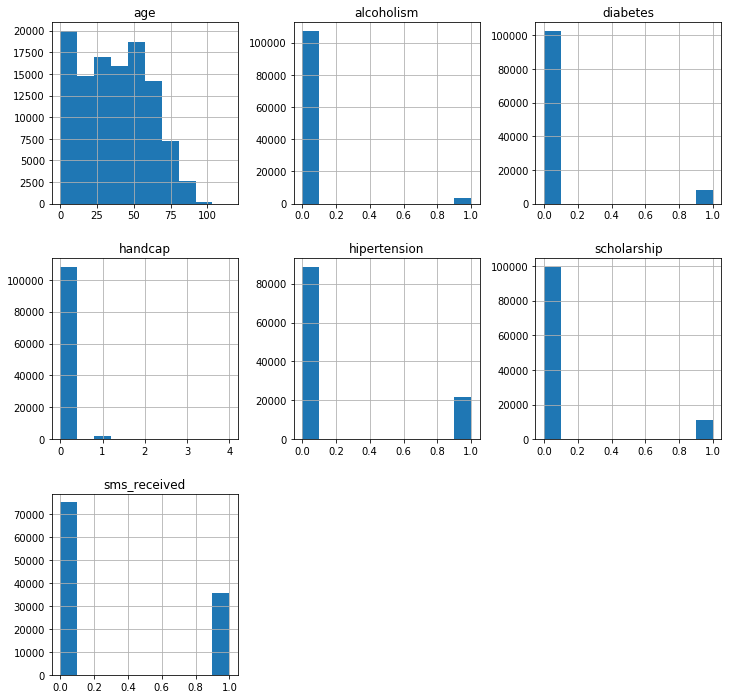

In [25]:
df[['age', 'alcoholism', 'diabetes', 'handcap', 'hipertension', 'scholarship', 'sms_received']].hist(figsize=(12,12));

<a id='eda'></a>
## Exploratory Data Analysis

In [26]:
df['no_show_int'] = np.where(df['no_show'] == 'Yes', 0, 1)

- A new column "no_show_int" created where 0 indicates absence and 1 indicates presence
- With the new column, more built-in functions are available to facilitate the assessment of the dataset

### Research Question 1: Is a specific gender associated with higher absence rate?

In [27]:
df.groupby('gender').no_show_int.mean()

gender
F    0.796885
M    0.800362
Name: no_show_int, dtype: float64

In [28]:
female_absence = 1 - df.query('gender == "F"').no_show_int.mean()
male_absence = 1 - df.query('gender == "M"').no_show_int.mean()

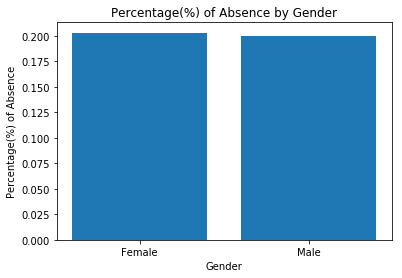

In [29]:
plt.bar(["Female", "Male"], [female_absence, male_absence])
plt.title("Percentage(%) of Absence by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage(%) of Absence");

- 20.31% of female patients were absent while 19.96% of male patients were absent

### Research Question 2: Are the patients who had to wait more days for medical appointment associated with higher absence rate?

In [30]:
df['wait_days'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64

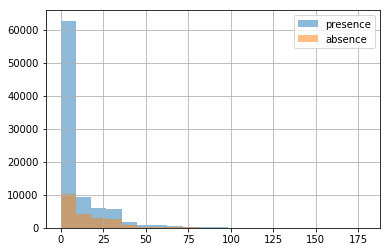

In [31]:
presence = df.no_show_int == 1
absence = df.no_show_int == 0
df.wait_days[presence].hist(alpha=0.5, bins=20, label='presence')
df.wait_days[absence].hist(alpha=0.5, bins=20, label='absence')
plt.legend();

- Findings from the descriptive data of column "wait_time"
    - The distribution of waiting days is skewed. Same day ("0 days") appointments up to the 25th percentile
    - Wait time surged from 15 days at 75th percentile to 179 days at maximum

In [32]:
bin_edges = [0, 1, 5, 10, 15, 30, 60, 180]
bin_names = ['same_day', '1-5', '6-10', '11-15', '16-30', '31-60', '>60']
df['wait_days_range'] = pd.cut(df['wait_days'], bin_edges, labels=bin_names, include_lowest=True, right=True)
df['wait_days_range'].value_counts()

same_day    43775
1-5         18029
16-30       15868
6-10        14271
31-60        8283
11-15        8200
>60          2095
Name: wait_days_range, dtype: int64

- New column "wait_days_range" created
    - As shown in the descriptive data, the days of waiting are not evenly distributed. The ranges of days in the new column are defined in an attempt to distribute sufficient entries to each range group while allowing them to differentiate from one another 
    - Values in column "wait_days" divided into 7 ranges
        - "same_day": same day appointment
        - "1-5": 1 to 5 days of waiting
        - "6-10": 6 to 10 days of waiting
        - "11-15": 11 to 15 days of waiting
        - "16-30": 16 to 30 days of waiting
        - "31-60": 31 to 60 days of waiting
        - ">60": more than 60 days of waiting
    - Almost 40% of the appointments were on the same day, and about 1.8% of the appointments were scheduled more than 60 days before

In [33]:
absence_wait_days = (1 - df.groupby('wait_days_range').no_show_int.mean())*100

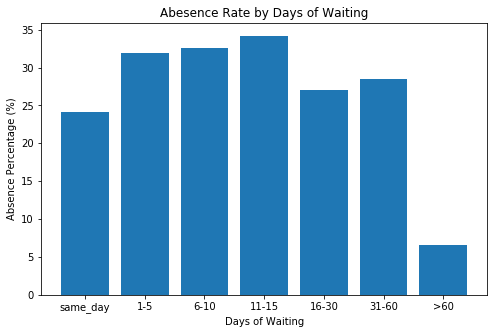

In [34]:
N = 7
index = np.arange(N)

plt.subplots(figsize=(8, 5))
plt.bar(absence_wait_days.index, absence_wait_days)
plt.xticks(index, ('same_day', '1-5', '6-10', '11-15', '16-30', '31-60', '>60'))
plt.title('Abesence Rate by Days of Waiting')
plt.xlabel('Days of Waiting')
plt.ylabel('Absence Percentage (%)');

- Surprisingly, patients who scheduled the appointment more than 60 days ahead have the lowest absence rate, followed by patients with same day appointment
- Within the range from 1 to 15 days of waiting, the absence rate escalates as waiting time becomes longer

### Research Question 3: Is a specific age group associated with higher absence rate?

In [35]:
df.age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

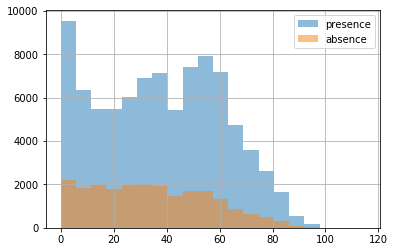

In [36]:
presence = df.no_show_int == 1
absence = df.no_show_int == 0
df.age[presence].hist(alpha=0.5, bins=20, label='presence')
df.age[absence].hist(alpha=0.5, bins=20, label='absence')
plt.legend();

- Check the distribution of patients' age

In [37]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 120]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '>=80']
df['age_group'] = pd.cut(df['age'], age_bins, labels=age_labels, include_lowest=True, right=False)

In [38]:
df.age_group.value_counts()

0-9      17474
50-59    15863
30-39    15170
40-49    14209
20-29    13698
10-19    12935
60-69    11876
70-79     5934
>=80      3362
Name: age_group, dtype: int64

- New column "age_group" created
    - Age of the patients is more evenly distributed than days of waiting. Ages are categorized in decades
    - Values in column "age" divided into 9 ranges
        - "0-9": 0 to 0 years of age
        - "10-19": 10 to 19 years of age
        - "20-29": 20 to 29 years of age
        - "30-39": 30 to 39 years of age
        - "40-49": 40 to 49 years of age
        - "50-59": 50 to 59 years of age
        - "60-69": 60 to 69 years of age
        - "70-79": 70 to 79 years of age
        - ">=80": 80 years of age of above

In [39]:
absence_age = (1 - df.groupby('age_group').no_show_int.mean())*100

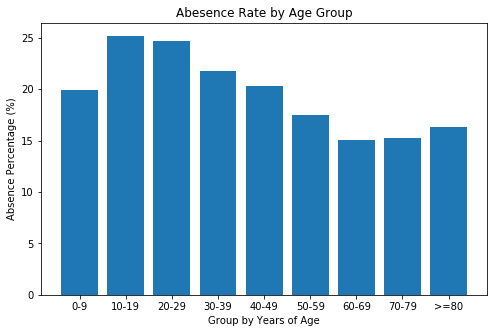

In [40]:
plt.subplots(figsize=(8, 5))
plt.bar(absence_age.index, absence_age)
plt.title('Abesence Rate by Age Group')
plt.xlabel('Group by Years of Age')
plt.ylabel('Absence Percentage (%)');

- Patients from 10 to 29 years of age have the highest absence rate
- Patients from 60 to 79 years of age have the lowest absence rate, followed by patients who are 80 years of age or older

### Research Question 4: Is reception of SMS message associated with absence rate?

In [41]:
df.groupby('sms_received').no_show_int.mean()

sms_received
0    0.833020
1    0.724255
Name: no_show_int, dtype: float64

In [42]:
df.groupby('sms_received').no_show_int.mean()
absence_sms = (1 - df.groupby('sms_received').no_show_int.mean())*100

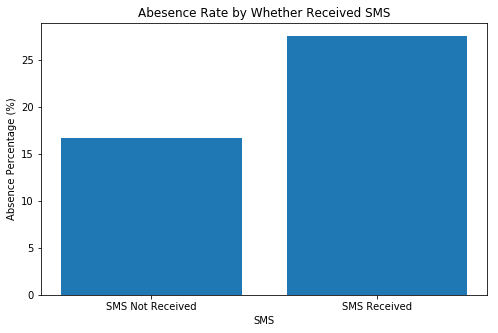

In [43]:
N = 2
ind = np.arange(N)

plt.subplots(figsize=(8, 5))
plt.bar(absence_sms.index, absence_sms)
plt.xticks(ind, ('SMS Not Received', 'SMS Received'))
plt.title('Abesence Rate by Whether Received SMS')
plt.xlabel('SMS')
plt.ylabel('Absence Percentage (%)');

- The result is quite counter-intuitive - the patients who did not receive SMS message have lower absence rate
- There might have been a third-cause fallacy

In [44]:
df.groupby('wait_days_range').sms_received.describe()

,count,mean,std,min,25%,50%,75%,max
wait_days_range,,,,,,,,
same_day,43775.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1-5,18029.0,0.333574,0.471503,0.0,0.0,0.0,1.0,1.0
6-10,14271.0,0.607456,0.488334,0.0,0.0,1.0,1.0,1.0
11-15,8200.0,0.584390,0.492857,0.0,0.0,1.0,1.0,1.0
16-30,15868.0,0.604802,0.488909,0.0,0.0,1.0,1.0,1.0
31-60,8283.0,0.610769,0.487605,0.0,0.0,1.0,1.0,1.0
>60,2095.0,0.644869,0.478667,0.0,0.0,1.0,1.0,1.0


- A closer look at "wait_days_range" variable shows that no SMS message is sent to patients with same day appointment. This group has the second lowest absence rate among all range groups and account for almost 40% of the data entries. In other word, this could be a factor that causes fallacy

In [45]:
df_without_sameday = df.query('wait_days_range != "same_day"')
absence_sms_without_sameday = (1 - df_without_sameday.groupby('sms_received').no_show_int.mean())*100

In [46]:
1 - df_without_sameday.groupby('sms_received').no_show_int.mean()

sms_received
0    0.307862
1    0.275745
Name: no_show_int, dtype: float64

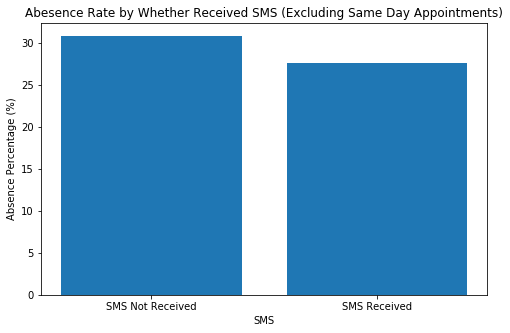

In [47]:
N = 2
ind = np.arange(N)

plt.subplots(figsize=(8, 5))
plt.bar(absence_sms_without_sameday.index, absence_sms_without_sameday)
plt.xticks(ind, ('SMS Not Received', 'SMS Received'))
plt.title('Abesence Rate by Whether Received SMS (Excluding Same Day Appointments)')
plt.xlabel('SMS')
plt.ylabel('Absence Percentage (%)');

- If same day appointments are not considered, the absence rate of patients who received SMS message is about 3% lower than those who did not receive SMS message

### Research Question 5: Are patients in a specific disability category associated with higher absence rate?

In [48]:
absence_handcap = (1 - df.groupby('handcap').no_show_int.mean())*100

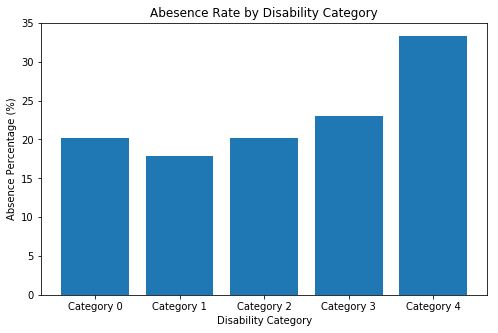

In [49]:
N = 5
ind = np.arange(N)

plt.subplots(figsize=(8, 5))
plt.bar(absence_handcap.index, absence_handcap)
plt.xticks(ind, ('Category 0', 'Category 1', 'Category 2', 'Category 3', 'Category 4'))
plt.title('Abesence Rate by Disability Category')
plt.xlabel('Disability Category')
plt.ylabel('Absence Percentage (%)');

- The absence rate of patients in disability catetegoy 4 is the lowest among categories categories
- Category 1 has lower absence rate than patients without disability
- It needs to be noted that there is only three entries in category 4 and thirteen entries in category 3. More entries might be needed to conclude statistically significant correlations

<a id='conclusions'></a>
## Conclusions

### Findings

This project analyzes data associated with medical appointments in Brazil. The goal of the project is to find potential trends among the patients who were absent from the appointment, and how they differed from the patients who showed up. Specifically, the variables below are used as independent variables for appointment absence rate:

#### Gender
There is no large difference of absence rate by gender. Female's absence rate is 0.35% higher than that of male.

#### Number of waiting days
Patients who scheduled an appointment more than 60 days ahead have the lowest absence rate, followed by those who had same day appointments. Patients with days of waiting between 16 and 60 have lower absence rate than those with days of waiting between 1 and 15. More information about the type of appointment, with what department is the appointment, and medical resources (e.g. number of patients per doctor) would probably facilitate identification of correlations. For example, we would be able to know if a patient made an appointment long ahead the time because there were no time slot available or it was a regular checkup.

#### Age
Young patients (10 to 29 years of age) have the highest absence rate while 60 to 69 years of age is the range group with lowest absence rate. The general pattern is the older a patient is, the lower absence rate he or she would have.

#### SMS message
Patients who received SMS message have an absence rate about 3% lower than those who did not. However, more information is needed to determine the accuracy of the data. For example, a sent SMS message does not necessarily mean a received SMS message. It is possible that the message was sent to the number of the patient but the patient actually did not receive them or the number was changed and never updated.

#### Disability
The general pattern is higher disability category seems to be associated with higher absence rate. However, more samples are needed to reach statistical significance. 

### Other limitations
I removed a few entries which I regarded as entry errors - entries with negative age or negative days of waiting. I assume that the size of data removed is not large enough to significantly change the analysis result. However, these are still appointments made and there is probably a better way to deal with these data entries.

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0